## Joukowski Transformation

In [76]:
import numpy
import math
from matplotlib import pyplot
# embed the figures into the notebook
%matplotlib inline

In [77]:
3+2j

(3+2j)

In [78]:
a = 3
b = 3
z = a + b * 1j

In [79]:
z

(3+3j)

In [263]:
(7.51-9.15*1j)/(4.43+9.64*1j)

(-0.4880897698448308-1.0033441577191493j)

In [81]:
1.4 * numpy.exp(5.31*1j)

(0.78773681476704538-1.1573550495248508j)

## Shapes Created by Transformation

In [189]:
N = 50
x_start, x_end = -4.0,4.0
y_start, y_end = -4.0,4.0
x = numpy.linspace(x_start, x_end, N)
y = numpy.linspace(y_start, y_end, N)
X, Y = numpy.meshgrid(x,y)

In [190]:
#plot circle
r = 1.5
theta = numpy.linspace(0,2*math.pi, 100)
x_circle = r*numpy.cos(theta)
y_circle = r*numpy.sin(theta)
z_circle1 = E = numpy.zeros(x_circle.shape)
z_circle1 = x_circle + y_circle*1j

#Joukowski transform
c_circle1 = 1
E_circle1 = z_circle1 + (c**2)/z_circle1

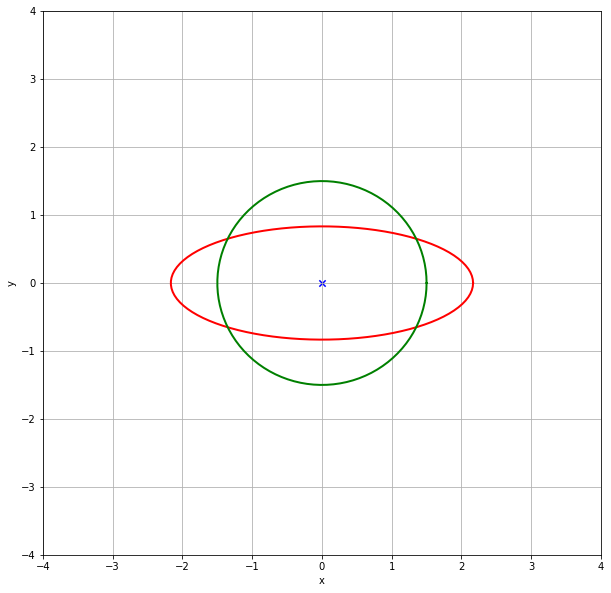

In [191]:
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.grid(True)
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.plot(E_circle1.real, E_circle1.imag, color='r', linewidth = 2);
pyplot.plot(z_circle1.real, z_circle1.imag, color='g', linewidth = 2);
pyplot.scatter(0, 0, color='b', s=40, marker='x');

In [192]:
#plot circle 2
r_circle2 = 1.2
c_circle2 = 1
x_offset2 = c_circle2 - r_circle2
y_offset2 = 0
x_circle2 = r_circle2*numpy.cos(theta) + x_offset2
y_circle2 = r_circle2*numpy.sin(theta) + y_offset2
z_circle2 = E_circle2 = numpy.zeros(x_circle2.shape)
z_circle2 = x_circle2 + y_circle2*1j

#Joukowski transform
E_circle2 = z_circle2 + (c2**2)/z_circle2

In [193]:
def jukowski(z,c):
    result = z + c**2/z
    return result

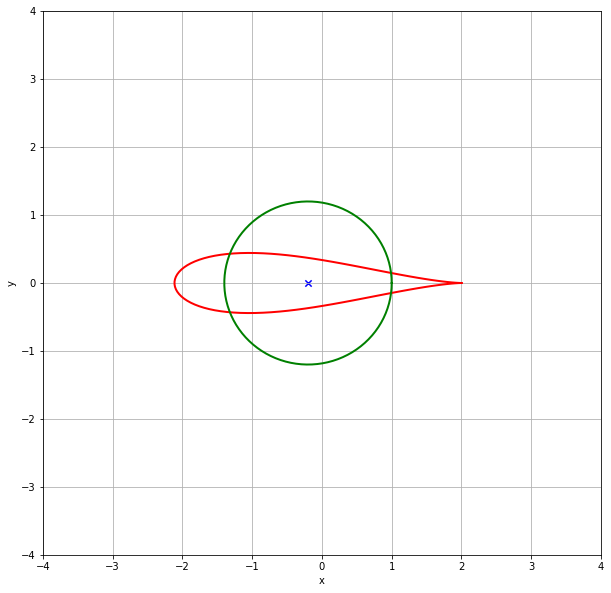

In [194]:
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.grid(True)
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.plot(E_circle2.real, E_circle2.imag, color='r', linewidth = 2);
pyplot.plot(z_circle2.real, z_circle2.imag, color='g', linewidth = 2);
pyplot.scatter(x_offset2, y_offset2, color='b', s=40, marker='x');

In [195]:
#plot circle 2
c_circle3 = 1
r_circle3 = 1.2
x_offset3 = -0.1
y_offset3 = 0.1
r = math.sqrt((c_circle3-x_offset3)**2+y_offset3**2)
x_circle3 = r*numpy.cos(theta) + x_offset3
y_circle3 = r*numpy.sin(theta) + y_offset3
z_circle3 = E2 = numpy.zeros(x_circle3.shape)
z_circle3 = x_circle3 + y_circle3*1j

#Joukowski transform
E_circle3 = z_circle3 + (c_circle3**2)/z_circle3

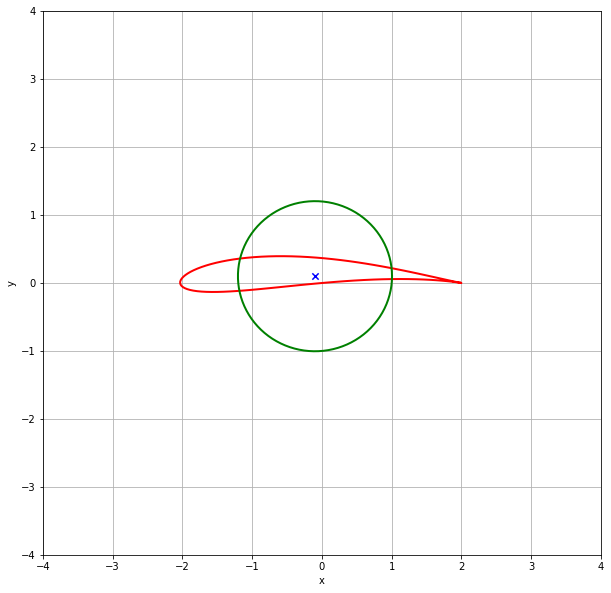

In [196]:
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.grid(True)
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.plot(E_circle3.real, E_circle3.imag, color='r', linewidth = 2);
pyplot.plot(z_circle3.real, z_circle3.imag, color='g', linewidth = 2);
pyplot.scatter(x_offset3, y_offset3, color='b', s=40, marker='x');

## Grid points in polar

In [197]:
Nr = 100
Ntheta = 145
rmin = 1.15
c = 1.0;
r = numpy.linspace(rmin,5,Nr)
thetap = numpy.linspace(0,2*math.pi, Ntheta)
R,theta_polar = numpy.meshgrid(r,thetap)
z = R*numpy.cos(theta_polar)+c_polar-rmin + R*numpy.sin(theta_polar)*1j


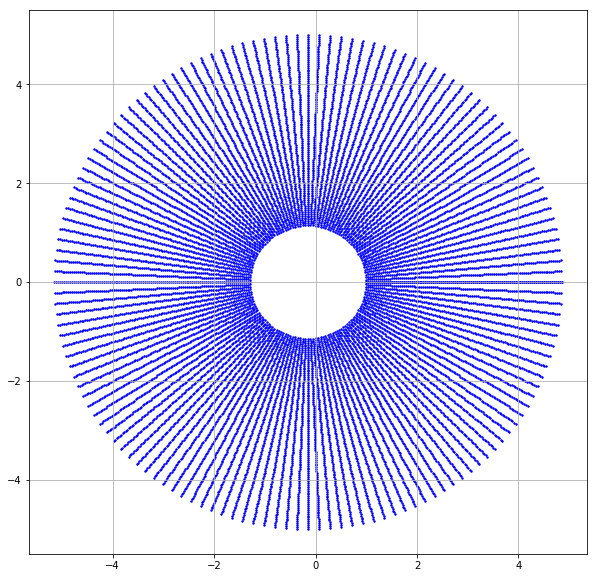

In [198]:
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.grid(True)
pyplot.scatter(z.real, z.imag, color ='b', s=2);

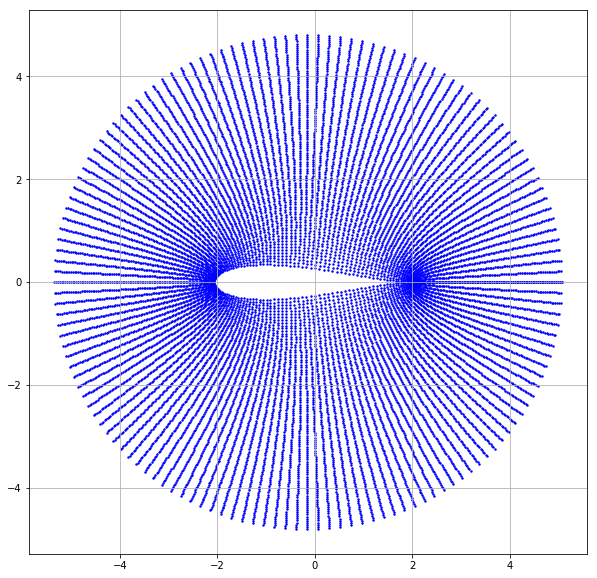

In [199]:
##now to plot onto E plane
E = z + c**2/z

width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.grid(True)
pyplot.scatter(E.real, E.imag, color ='b', s=2);

## Flow over a Symmetric Airfoil

In [200]:
u_inf = 1.0 #set freestream
X_z = z.real
Y_z = z.imag
psi_freestream = u_inf*Y_z


#create doublet
gamma = 2*math.pi*rmin**2*u_inf
xd = c-rmin
yd = 0

In [201]:
def get_velocity_doublet(strength, xd, yd, X, Y):
    
    u = (- strength / (2 * math.pi) *
         ((X - xd)**2 - (Y - yd)**2) /
         ((X - xd)**2 + (Y - yd)**2)**2)
    v = (- strength / (2 * math.pi) *
         2 * (X - xd) * (Y - yd) /
         ((X - xd)**2 + (Y - yd)**2)**2)
    
    return u,v

In [202]:
def get_stream_function_doublet(strength, xd, yd, X, Y):
    
    psi = - strength / (2 * math.pi) * (Y - yd) / ((X - xd)**2 + (Y - yd)**2)
    
    return psi

In [203]:
u_doublet, v_doublet = get_velocity_doublet(gamma, xd, yd, z.real, z.imag)
psi_doublet = get_stream_function_doublet(gamma, xd, yd, z.real, z.imag)


In [267]:
u = u_doublet + u_inf
v = v_doublet
psi = psi_freestream + psi_doublet
z_inside = rmin*numpy.cos(thetap)+c_polar-rmin + rmin*numpy.sin(thetap)*1j

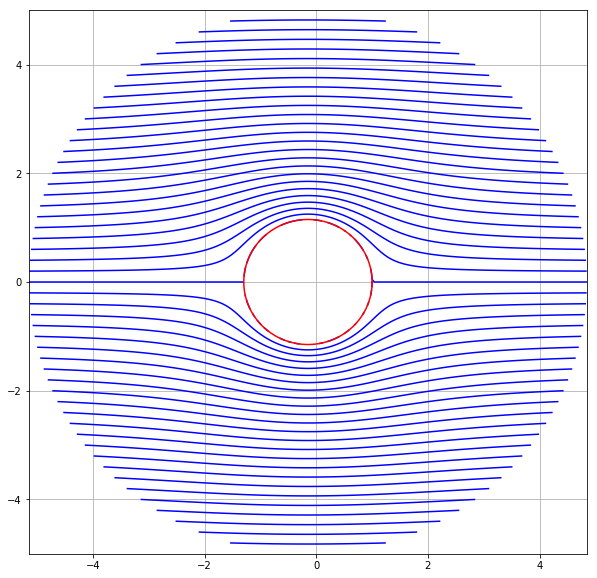

In [268]:
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.grid(True)
pyplot.contour(X_z, Y_z, psi, levels = numpy.linspace(numpy.min(psi), numpy.max(psi),51), colors = 'b', linestyles = 'solid')
pyplot.plot(z_inside.real,z_inside.imag,color = 'r');

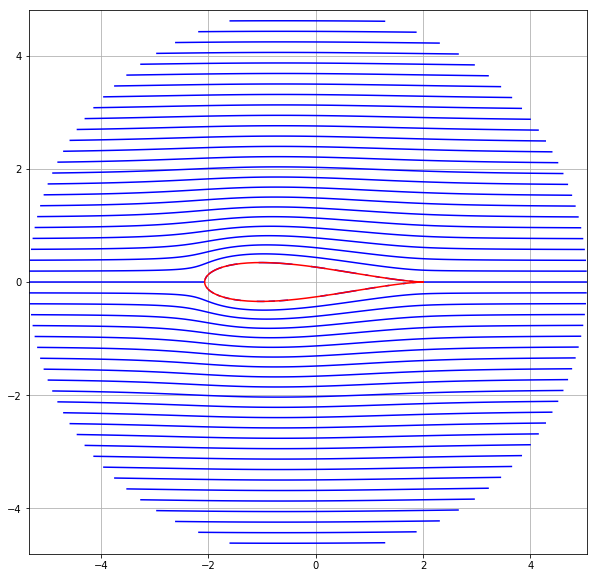

In [270]:
E_xi = jukowski(z, c)
X_xi = E.real
Y_xi = E.imag
psi_E_xi = psi
xi_inside = jukowski(z_inside,c)
pyplot.figure(figsize=(width, height))
pyplot.grid(True)
pyplot.contour(X_xi, Y_xi, psi_E_xi, levels = numpy.linspace(numpy.min(psi_E_xi), numpy.max(psi_E_xi),51), colors = 'b', linestyles = 'solid')
pyplot.plot(xi_inside.real,xi_inside.imag,color = 'r');

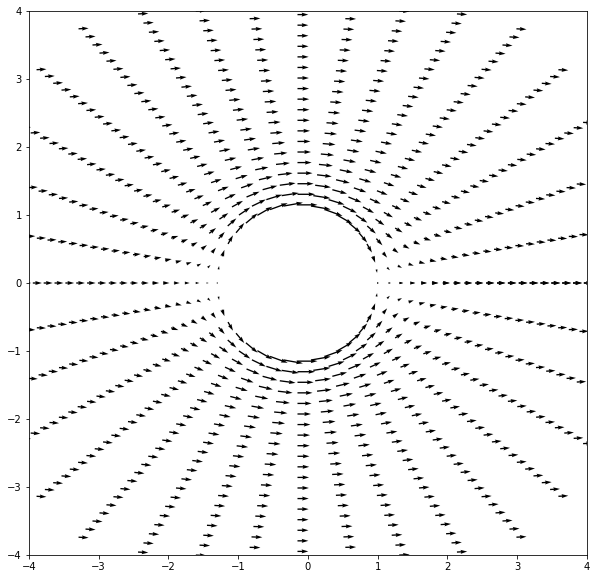

In [207]:
#plot quiver for z-plane
pyplot.figure(figsize=(width, height))
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.quiver(X_z[::4,::4], Y_z[::4,::4],u[::4,::4],v[::4,::4]);

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


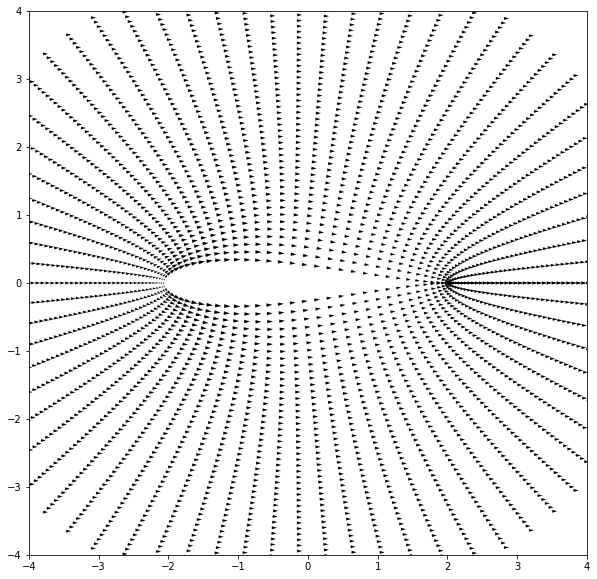

In [223]:
#plot quiver for xi plane
V_z = u -v*1j
V_xi = V_z/(1-(c/z)**2)

pyplot.figure(figsize=(width, height))
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.quiver(X_xi[::2,::2],Y_xi[::2,::2],V_xi.real[::2,::2],-V_xi.imag[::2,::2]);

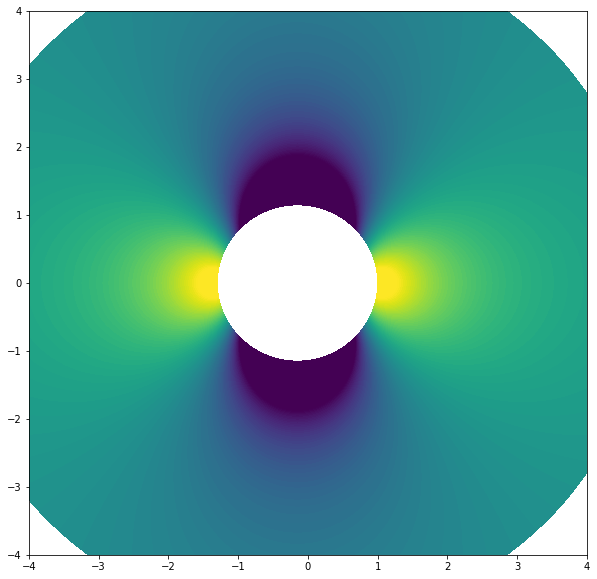

In [209]:
#find pressure coefficients
cp_z = 1 - (u**2+v**2)/u_inf**2


level = numpy.linspace(-0.88,0.88,100)
pyplot.figure(figsize=(width, height))
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.contourf(X_z, Y_z, cp_z, levels = level, extend = 'both');

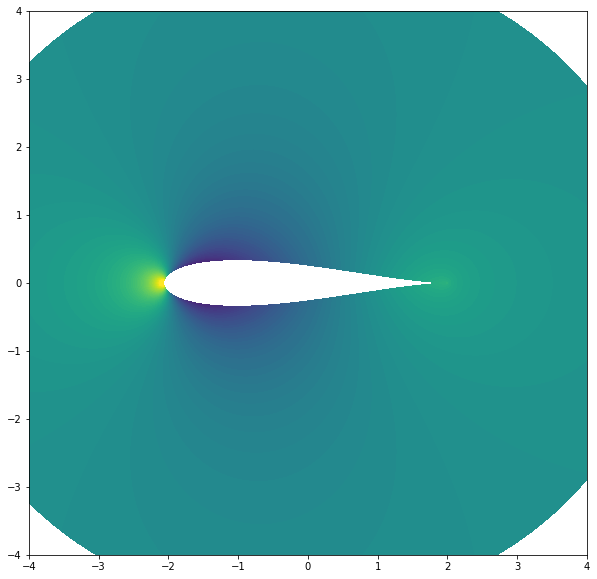

In [210]:
##now for pressure in the xi - plane
cp_xi = 1- ((V_xi.real**2+V_xi.imag**2)/u_inf**2)

pyplot.figure(figsize=(width, height))
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.contourf(X_xi, Y_xi, cp_xi, levels = level, extend='both');

In [211]:
#strength of the doublet
gamma

8.309512568745001

In [276]:
#Velocity at the 62nd pt on the airfoil
V_xi[61,0]

(1.1063384662852436-0.52363334929849692j)

In [213]:
#Minimum Cp on airfoil
numpy.min(cp_xi[1:,0])

-0.68775567409240423

## Flow over a symmetric Joukowski airfoil with non-zero angle of attack

In [214]:
#set angle of attack
AA = 20*math.pi/180 #in rad
#set to Z' plane
xc = c-rmin
x_prime = (X_z-xc)*numpy.cos(AA) + Y_z*numpy.sin(AA)
y_prime = -(X_z-xc)*numpy.sin(AA) + Y_z*numpy.cos(AA)
x_doublet_prime, y_doublet_prime = 0.0,0.0
u_doublet_prime, v_doublet_prime = get_velocity_doublet(gamma, x_doublet_prime, y_doublet_prime, x_prime, y_prime)
psi_doublet_prime = get_stream_function_doublet(gamma, x_doublet_prime, y_doublet_prime, x_prime, y_prime)

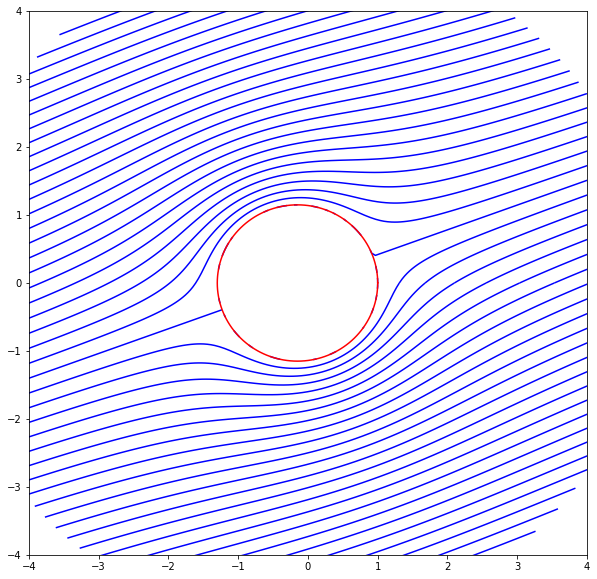

In [272]:
#freestream superpositoin
u_prime = u_doublet_prime + u_inf
v_prime = v_doublet_prime
psi_prime = psi_doublet_prime + u_inf*y_prime

pyplot.figure(figsize=(width, height))
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.contour(X_z, Y_z, psi_prime, levels = numpy.linspace(numpy.min(psi_prime), numpy.max(psi_prime),51), colors = 'b', linestyles = 'solid')
pyplot.plot(z_inside.real,z_inside.imag,color = 'r');

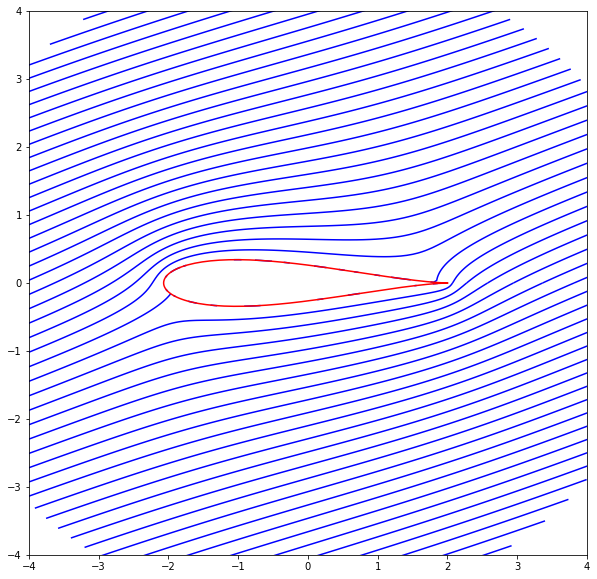

In [274]:
#for the airfoil case
pyplot.figure(figsize=(width, height))
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.contour(X_xi, Y_xi, psi_prime, levels = numpy.linspace(numpy.min(psi_prime), numpy.max(psi_prime),51), colors = 'b', linestyles = 'solid')
pyplot.plot(xi_inside.real,xi_inside.imag,color = 'r');

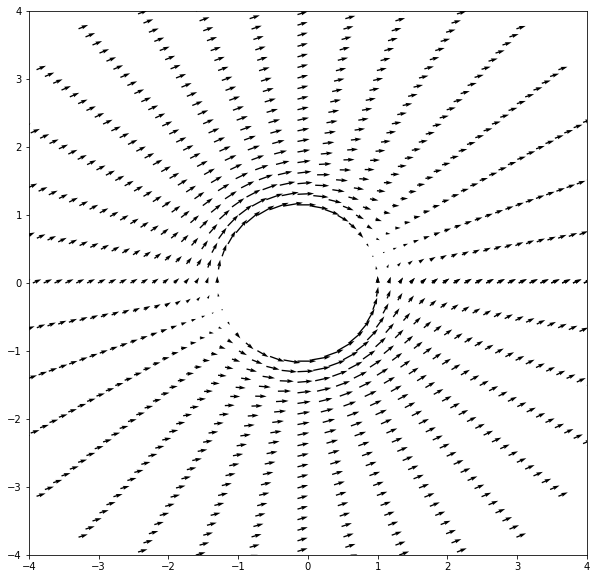

In [219]:
#quiver for z-plane
V_z_prime = (u_prime - v_doublet_prime*1j)*numpy.exp(-AA*1j)
pyplot.figure(figsize=(width, height))
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.quiver(X_z[::4,::4], Y_z[::4,::4],V_z_prime.real[::4,::4],-V_z_prime.imag[::4,::4]);

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


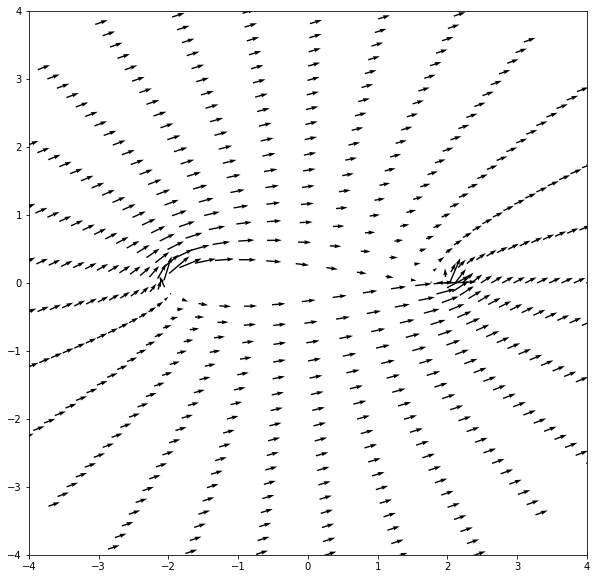

In [222]:
#quiver in xi plane
V_xi_prime = V_z_prime/(1-(c/z)**2)

pyplot.figure(figsize=(width, height))
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.quiver(X_xi[::5,::5],Y_xi[::5,::5],V_xi_prime.real[::5,::5],-V_xi_prime.imag[::5,::5]);

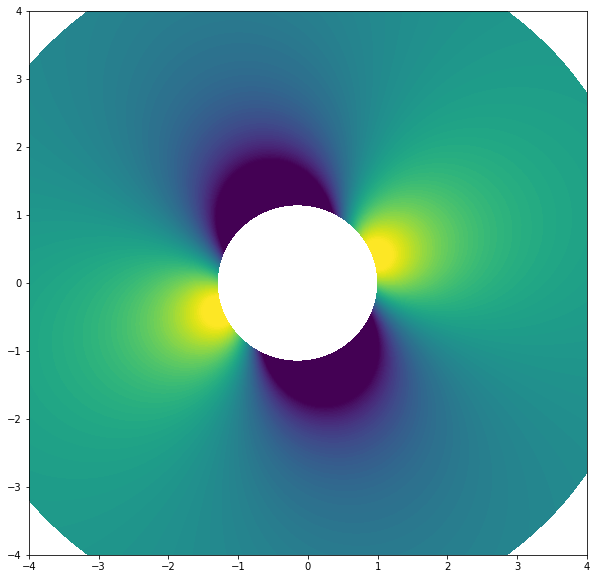

In [225]:
#new pressure coefficient
cp_z_prime = 1-(V_z_prime.real**2 + V_z_prime.imag**2)/u_inf**2

pyplot.figure(figsize=(width, height))
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.contourf(X_z, Y_z, cp_z_prime, levels = level, extend='both');

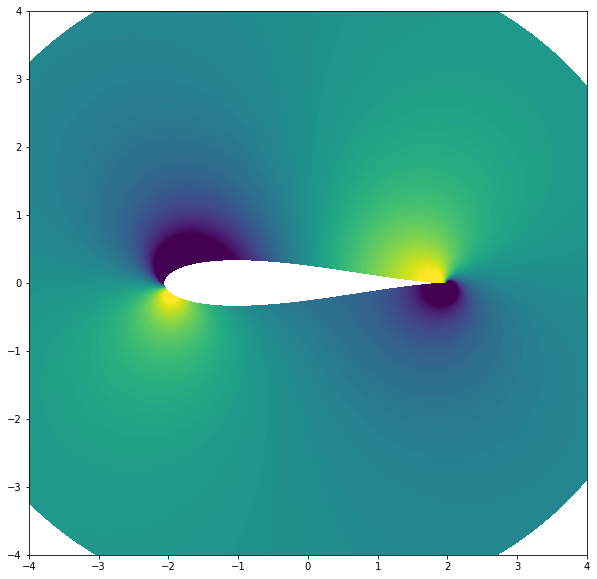

In [226]:
##now for pressure in the xi - plane
cp_xi_prime = 1- ((V_xi_prime.real**2+V_xi_prime.imag**2)/u_inf**2)

pyplot.figure(figsize=(width, height))
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.contourf(X_xi, Y_xi, cp_xi_prime, levels = level, extend='both');

In [230]:
#where are the stagnation points?
numpy.where(numpy.abs(V_xi_prime.real[:,0])<1e-10)

(array([ 8, 72, 80]),)

In [231]:
#what is the velocity at the 50th pt on the airfoil?
V_xi_prime[49,0]

(1.4830654150147842-0.092075495007288205j)

In [232]:
#what is the Cp at the 75th pt on the airfoil?
cp_xi_prime[74,0]

-0.48520991643725964

## Adding circulation

In [233]:
def get_velocity_vortex(strength, xv, yv, X, Y):

    u = +strength / (2*math.pi)*(Y-yv)/((X-xv)**2+(Y-yv)**2)
    v = -strength / (2*math.pi)*(X-xv)/((X-xv)**2+(Y-yv)**2)
    
    return u, v

In [234]:
def get_stream_function_vortex(strength, xv, yv, X, Y):
    
    psi = strength / (4*math.pi)*numpy.log((X-xv)**2+(Y-yv)**2)

    return psi

In [235]:
#strength of vortex
kappa = -gamma*numpy.sin(-2*AA)/(rmin*numpy.cos(-AA))
x_vortex, y_vortex = 0.0,0.0
u_vortex, v_vortex = get_velocity_vortex(kappa, x_vortex, y_vortex, x_prime, y_prime)
psi_vortex = get_stream_function_vortex(kappa, x_vortex, y_vortex, x_prime, y_prime)

In [237]:
#superposition
u_circ = u_vortex + u_prime
v_circ = v_vortex + v_prime
psi_circ = psi_vortex + psi_prime

V_z_circ = (u_circ - v_circ*1j)*numpy.exp(-AA*1j)

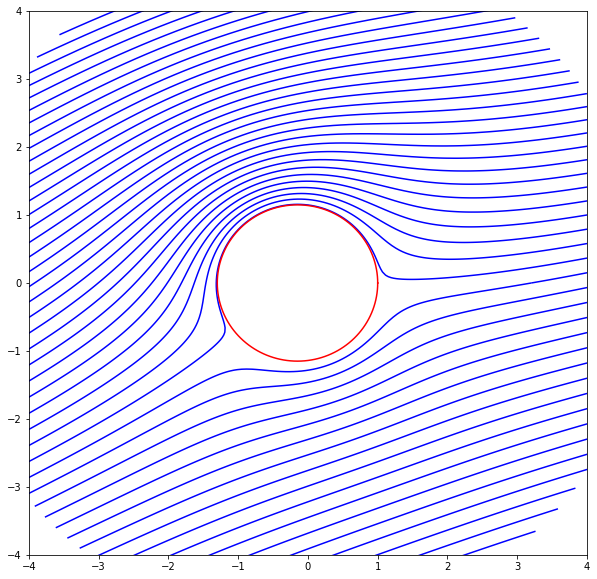

In [273]:
pyplot.figure(figsize=(width, height))
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.contour(X_z, Y_z, psi_circ, levels = numpy.linspace(numpy.min(psi_circ), numpy.max(psi_circ),51), colors = 'b', linestyles = 'solid')
pyplot.plot(z_inside.real,z_inside.imag,color = 'r');

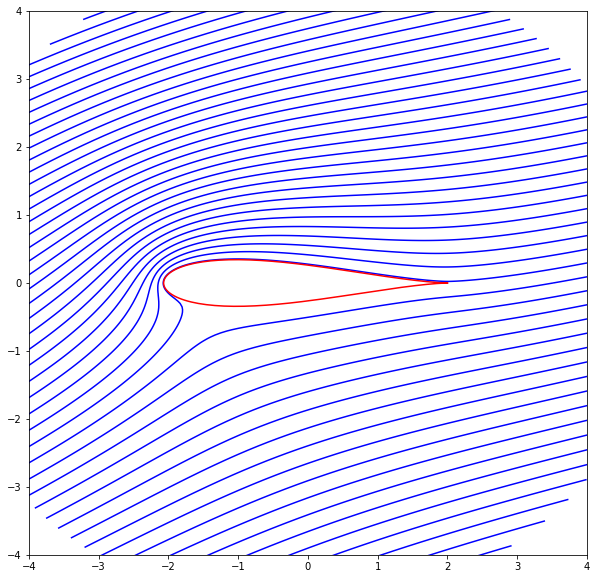

In [275]:
pyplot.figure(figsize=(width, height))
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.contour(X_xi, Y_xi, psi_circ, levels = numpy.linspace(numpy.min(psi_circ), numpy.max(psi_circ),51), colors = 'b', linestyles = 'solid')
pyplot.plot(xi_inside.real,xi_inside.imag,color = 'r');

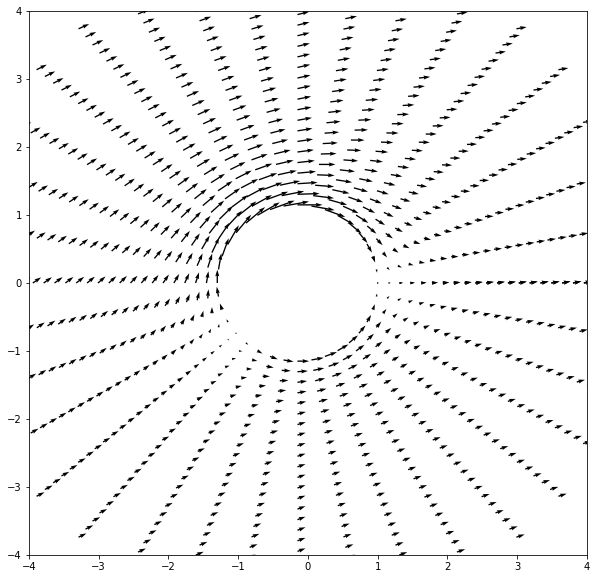

In [245]:
pyplot.figure(figsize=(width, height))
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.quiver(X_z[::4,::4], Y_z[::4,::4],V_z_circ.real[::4,::4],-V_z_circ.imag[::4,::4]);

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


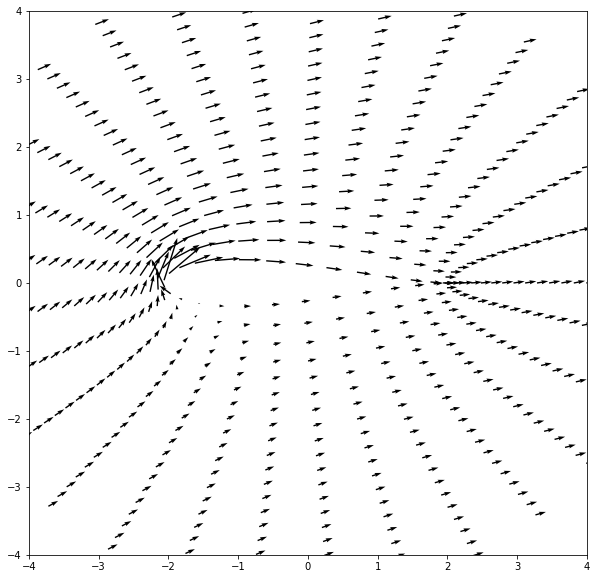

In [246]:
#quiver in xi plane
V_xi_circ = V_z_circ/(1-(c/z)**2)

pyplot.figure(figsize=(width, height))
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.quiver(X_xi[::5,::5],Y_xi[::5,::5],V_xi_circ.real[::5,::5],-V_xi_circ.imag[::5,::5]);

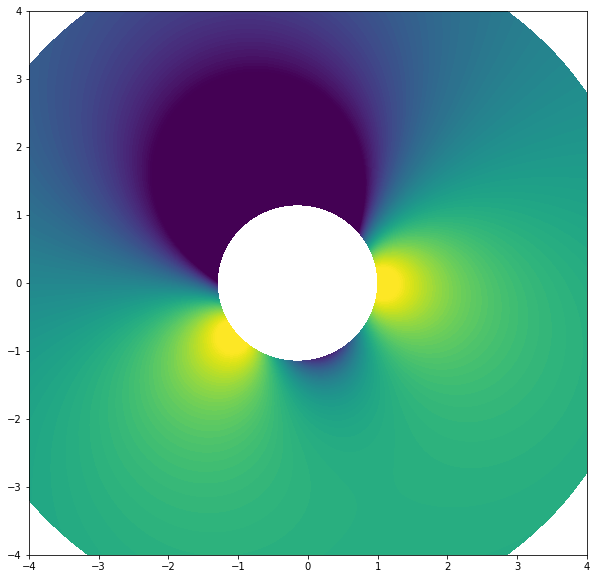

In [247]:
#new pressure coefficient
cp_z_circ = 1-(V_z_circ.real**2 + V_z_circ.imag**2)/u_inf**2

pyplot.figure(figsize=(width, height))
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.contourf(X_z, Y_z, cp_z_circ, levels = level, extend='both');

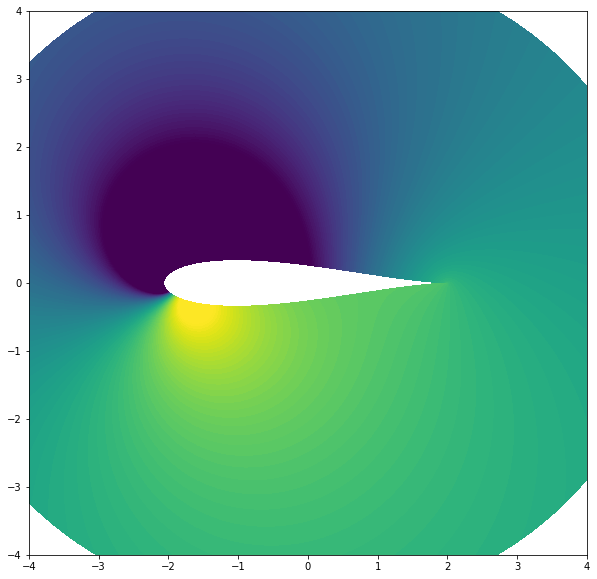

In [249]:
##now for pressure in the xi - plane
cp_xi_circ = 1- ((V_xi_circ.real**2+V_xi_circ.imag**2)/u_inf**2)

pyplot.figure(figsize=(width, height))
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.contourf(X_xi, Y_xi, cp_xi_circ, levels = level, extend='both');

In [250]:
##what is the strength of the vortex?
kappa

4.9426446603975833

In [252]:
#calculate lift
rho = 1.0
Lift = rho*u_inf*kappa
Lift*numpy.cos(AA)

4.6445667145424814

In [253]:
##what is the drag

In [280]:
#where are the stagnation points
numpy.where(numpy.abs(V_xi_circ[:,0])<1e-1)

(array([87, 88, 89]),)

In [257]:
#Velocity at the 92nd point on the airfoil
V_xi_circ[91,0]

(0.20848311620747642+0.031988389195052508j)

In [258]:
#What is the Cp at the 111th point on the airfoil?
cp_xi_circ[110,0]

0.49669467238347365

In [ ]:
#What happens with the pressure coefficient on the trailing edge?
